In [1]:
# %config IPCompleter.greedy=False

In [2]:
from fastai.tabular import *
import pandas as pd
from tqdm import tqdm

# Data preparation

In [3]:
TARGET_COLUMN_NAME = 'Close'
DATE_COLUMN_NAME = 'Date'

## Get the data

In [4]:
from datetime import datetime
df = pd.read_csv("BTC-ETH_.csv",
                 #read dates as dates
                 parse_dates=[DATE_COLUMN_NAME], date_parser=lambda x: datetime.fromtimestamp(int(x)))

In [5]:
df.head()

,Date,Open,High,Low,Close,Total Trade Quantity
0,2019-10-14 07:57:00,0.022033,0.022033,0.022033,0.022033,0.151851
1,2019-10-14 07:58:00,0.022033,0.022033,0.022030,0.022030,13.530307
2,2019-10-14 07:59:00,0.022030,0.022030,0.022030,0.022030,4.623229
3,2019-10-14 08:00:00,0.022004,0.022008,0.022000,0.022008,15.558100
4,2019-10-14 08:01:00,0.022004,0.022008,0.022000,0.022008,15.558100


## Format the data

In [6]:
add_datepart(df, DATE_COLUMN_NAME, time=True);
df.head()

,Open,High,Low,Close,Total Trade Quantity,Year,Month,Week,Day,Dayofweek,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Hour,Minute,Second,Elapsed
0,0.022033,0.022033,0.022033,0.022033,0.151851,2019,10,42,14,0,...,False,False,False,False,False,False,7,57,0,1571039820
1,0.022033,0.022033,0.022030,0.022030,13.530307,2019,10,42,14,0,...,False,False,False,False,False,False,7,58,0,1571039880
2,0.022030,0.022030,0.022030,0.022030,4.623229,2019,10,42,14,0,...,False,False,False,False,False,False,7,59,0,1571039940
3,0.022004,0.022008,0.022000,0.022008,15.558100,2019,10,42,14,0,...,False,False,False,False,False,False,8,0,0,1571040000
4,0.022004,0.022008,0.022000,0.022008,15.558100,2019,10,42,14,0,...,False,False,False,False,False,False,8,1,0,1571040060


### Convert to float

In [7]:
df = df.astype(float)
df.head()

,Open,High,Low,Close,Total Trade Quantity,Year,Month,Week,Day,Dayofweek,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Hour,Minute,Second,Elapsed
0,0.022033,0.022033,0.022033,0.022033,0.151851,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,57.0,0.0,1.571040e+09
1,0.022033,0.022033,0.022030,0.022030,13.530307,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,58.0,0.0,1.571040e+09
2,0.022030,0.022030,0.022030,0.022030,4.623229,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,59.0,0.0,1.571040e+09
3,0.022004,0.022008,0.022000,0.022008,15.558100,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.571040e+09
4,0.022004,0.022008,0.022000,0.022008,15.558100,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,1.571040e+09


### Check for NANs

In [8]:
[(column, sum(df[column].isna())) for column in df.columns]

[('Open', 0),
 ('High', 0),
 ('Low', 0),
 ('Close', 0),
 ('Total Trade Quantity', 0),
 ('Year', 0),
 ('Month', 0),
 ('Week', 0),
 ('Day', 0),
 ('Dayofweek', 0),
 ('Dayofyear', 0),
 ('Is_month_end', 0),
 ('Is_month_start', 0),
 ('Is_quarter_end', 0),
 ('Is_quarter_start', 0),
 ('Is_year_end', 0),
 ('Is_year_start', 0),
 ('Hour', 0),
 ('Minute', 0),
 ('Second', 0),
 ('Elapsed', 0)]

In [9]:
print(df.describe(include="all"))

               Open          High           Low         Close  \
count  27788.000000  27788.000000  27788.000000  27788.000000   
mean       0.020890      0.020892      0.020887      0.020889   
std        0.000990      0.000990      0.000991      0.000991   
min        0.018971      0.019005      0.018897      0.019005   
25%        0.019844      0.019845      0.019840      0.019843   
50%        0.021233      0.021236      0.021229      0.021234   
75%        0.021777      0.021778      0.021776      0.021776   
max        0.022477      0.022500      0.022470      0.022484   

       Total Trade Quantity     Year         Month          Week  \
count          2.778800e+04  27788.0  27788.000000  27788.000000   
mean           4.433066e+00   2019.0     10.082230     42.943933   
std            1.985220e+01      0.0      0.274719      0.794968   
min            1.000000e-08   2019.0     10.000000     42.000000   
25%            2.063824e-01   2019.0     10.000000     42.000000   
50%   

In [10]:
df = df.drop(columns=['Second'])
df.shape

(27788, 20)

In [11]:
True_target_column_name = TARGET_COLUMN_NAME+'_future'

In [12]:
df[True_target_column_name] = df[TARGET_COLUMN_NAME].shift(-3)

In [13]:
df.head(10)

,Open,High,Low,Close,Total Trade Quantity,Year,Month,Week,Day,Dayofweek,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Hour,Minute,Elapsed,Close_future
0,0.022033,0.022033,0.022033,0.022033,0.151851,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,57.0,1.571040e+09,0.022008
1,0.022033,0.022033,0.022030,0.022030,13.530307,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,58.0,1.571040e+09,0.022008
2,0.022030,0.022030,0.022030,0.022030,4.623229,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,59.0,1.571040e+09,0.022000
3,0.022004,0.022008,0.022000,0.022008,15.558100,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.571040e+09,0.022000
4,0.022004,0.022008,0.022000,0.022008,15.558100,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,1.571040e+09,0.022013
5,0.022000,0.022000,0.022000,0.022000,10.862016,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,1.571040e+09,0.022024
6,0.022000,0.022000,0.022000,0.022000,10.862016,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,1.571040e+09,0.022036
7,0.022015,0.022015,0.022013,0.022013,2.339544,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,1.571040e+09,0.022034
8,0.022015,0.022024,0.022015,0.022024,11.265395,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,1.571040e+09,0.022033
9,0.022036,0.022036,0.022036,0.022036,0.887427,2019.0,10.0,42.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,1.571040e+09,0.022033


## Prepare train valid test

In [14]:
# TRAIN_VALID_TEST_SPLIT_RATIOS
trvate_split = tuple(int(x * len(df)) for x in (0.75, 0.9, 1.0))
print([int(len(df)* x) for x in (0.75, 0.15, 0.1)])
trvate_split

[20841, 4168, 2778]


(20841, 25009, 27788)

Search for batch size using http://www.alcula.com/calculators/math/gcd/

In [15]:
BATCH_SIZE = 120

In [16]:
tmp_train_limit = trvate_split[0]-trvate_split[0]%BATCH_SIZE
train_df = df[:tmp_train_limit]

tmp_valid_limit = trvate_split[1] -trvate_split[0]%BATCH_SIZE -(trvate_split[1]-trvate_split[0])%BATCH_SIZE
valid_df = df[tmp_train_limit:tmp_valid_limit]

test_df = df[tmp_valid_limit:(len(df)- len(df)%BATCH_SIZE)]

len(train_df), len(valid_df), len(test_df)

(20760, 4080, 2880)

In [17]:
def input_data(self: pd.DataFrame):
    return self.drop(columns=[True_target_column_name])
def target(self: pd.DataFrame):
    return self[[True_target_column_name]]

pd.DataFrame.input_data = input_data
pd.DataFrame.target = target

In [18]:
df.input_data().head()

,Open,High,Low,Close,Total Trade Quantity,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Hour,Minute,Elapsed
0,0.022033,0.022033,0.022033,0.022033,0.151851,2019.0,10.0,42.0,14.0,0.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,57.0,1.571040e+09
1,0.022033,0.022033,0.022030,0.022030,13.530307,2019.0,10.0,42.0,14.0,0.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,58.0,1.571040e+09
2,0.022030,0.022030,0.022030,0.022030,4.623229,2019.0,10.0,42.0,14.0,0.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,59.0,1.571040e+09
3,0.022004,0.022008,0.022000,0.022008,15.558100,2019.0,10.0,42.0,14.0,0.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.571040e+09
4,0.022004,0.022008,0.022000,0.022008,15.558100,2019.0,10.0,42.0,14.0,0.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,1.571040e+09


In [19]:
print('df.shape', df.shape)
print('train_df.shape', train_df.shape)
print('valid_df.shape', valid_df.shape)
print('test_df.shape', test_df.shape)

df.shape (27788, 21)
train_df.shape (20760, 21)
valid_df.shape (4080, 21)
test_df.shape (2880, 21)


## Normalize

In [20]:
from sklearn.preprocessing import StandardScaler#, PolynomialFeatures
# from sklearn.pipeline import Pipeline
# preprocessing_pipeline = Pipeline([
#     ("normalizer", StandardScaler())
#     ("poli-feature", PolynomialFeatures(degree=2))
# ]).fit(train_df.input_data(), train_df.target())

In [21]:
def transform_df(df_to_transform, transformer):
    return pd.DataFrame(transformer.transform(df_to_transform),
                        columns=df_to_transform.columns)
    

In [22]:
input_tranformer = StandardScaler()
input_tranformer.fit(train_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
train_data = transform_df(train_df, input_tranformer)
valid_data = transform_df(valid_df, input_tranformer)
test_data = transform_df(test_df, input_tranformer)
train_data.head()

,Open,High,Low,Close,Total Trade Quantity,Year,Month,Week,Day,Dayofweek,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Hour,Minute,Elapsed,Close_future
0,0.875639,0.873760,0.877658,0.875750,-0.213800,0.0,0.0,-1.004943,-1.686621,-1.440382,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.655072,1.587934,-1.733799,0.848229
1,0.875628,0.873749,0.874176,0.872266,0.405407,0.0,0.0,-1.004943,-1.686621,-1.440382,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.655072,1.645677,-1.733632,0.848229
2,0.872154,0.870273,0.874176,0.872266,-0.006847,0.0,0.0,-1.004943,-1.686621,-1.440382,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.655072,1.703420,-1.733465,0.839926
3,0.844087,0.845992,0.841696,0.848005,0.499261,0.0,0.0,-1.004943,-1.686621,-1.440382,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.509083,-1.703420,-1.733298,0.839926
4,0.844087,0.845992,0.841696,0.848005,0.499261,0.0,0.0,-1.004943,-1.686621,-1.440382,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.509083,-1.645677,-1.733131,0.854415


# Train

In [24]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

## DataLoaders

In [25]:
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_data.input_data().values),
                                        torch.from_numpy(train_data.target().values)),
                          shuffle=False, batch_size=BATCH_SIZE)
val_loader = DataLoader(TensorDataset(torch.from_numpy(valid_data.input_data().values),
                                      torch.from_numpy(valid_data.target().values)),
                        shuffle=False, batch_size=BATCH_SIZE)
test_loader = DataLoader(TensorDataset(torch.from_numpy(test_data.input_data().values),
                                       torch.from_numpy(test_data.target().values)),
                         shuffle=False, batch_size=BATCH_SIZE)

In [26]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
DEVICE

device(type='cuda')

## Model

In [27]:
class SentimentNet(nn.Module):
    def __init__(self, features, output_size=1,
#                  embedding_dim=10,
#                  hidden_dim=50,
                 n_layers=1,
                 drop_prob=0.5, device=torch.device("cpu")):
        super(SentimentNet, self).__init__()
        
        embedding_dim=features*2
        hidden_dim=features*8
        
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.device = device
        
        self.liniar = nn.Linear(features, embedding_dim)
        self.lstm = nn.LSTM(input_size=embedding_dim,
                            hidden_size=hidden_dim,
                            num_layers=n_layers, dropout=drop_prob, batch_first=True)
#         self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Sequential(nn.Linear(hidden_dim, hidden_dim//2),
                                nn.Dropout(drop_prob),
                                nn.Tanh(),
                                nn.Linear(hidden_dim//2, output_size))
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.float()
        
        liniar = self.liniar(x)
        lstm_out, hidden = self.lstm(liniar.view(batch_size, -1, liniar.shape[1]),
                                     (hidden[0][:,-batch_size:,:],# hidden
                                      hidden[1][:,-batch_size:,:]))# cell state
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
#         out = self.dropout(lstm_out)
        out = self.fc(lstm_out)
        
        out = out.view(batch_size, -1)
#         out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(self.device), # hidden
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(self.device)) # cell state
        return hidden

In [30]:
features_count = train_data.input_data().shape[1]
# output_size = 1
# embedding_dim = 400
# hidden_dim = 512
# n_layers = 2

model = SentimentNet(features_count, device=DEVICE)
model.to(DEVICE)

lr=0.0003
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [31]:
epochs = 6
counter = 0
print_every = 1
# clip = 5
valid_loss_min = np.Inf
lr_scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                   steps_per_epoch=len(train_loader),
                                                   epochs=epochs)

model.train()
for i in range(epochs):
    h = model.init_hidden(BATCH_SIZE)
    
    for inputs, labels in train_loader:
        counter += 1
        h = tuple([e.data for e in h])
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
#         nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        lr_scheduler.step()
        
        if counter%print_every == 0:
            val_h = model.init_hidden(BATCH_SIZE)
            val_losses = []
            model.eval()
            for inp, lab in val_loader:
                val_h = tuple([each.data for each in val_h])
                inp, lab = inp.to(DEVICE), lab.to(DEVICE)
                out, val_h = model(inp, val_h)
                val_loss = criterion(out.squeeze(), lab.float())
                val_losses.append(val_loss.item())
                
            model.train()
            print("Epoch: {}/{}...".format(i+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            if np.mean(val_losses) < valid_loss_min:
                torch.save(model.state_dict(), './state_dict.pt')
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
                valid_loss_min = np.mean(val_losses)

Epoch: 1/6... Step: 1... Loss: 0.679237... Val Loss: 2.276038
Validation loss decreased (inf --> 2.276038).  Saving model ...
Epoch: 1/6... Step: 2... Loss: 0.658726... Val Loss: 2.270478
Validation loss decreased (2.276038 --> 2.270478).  Saving model ...
Epoch: 1/6... Step: 3... Loss: 0.725427... Val Loss: 2.264896
Validation loss decreased (2.270478 --> 2.264896).  Saving model ...
Epoch: 1/6... Step: 4... Loss: 0.712062... Val Loss: 2.259309
Validation loss decreased (2.264896 --> 2.259309).  Saving model ...
Epoch: 1/6... Step: 5... Loss: 1.032497... Val Loss: 2.253734
Validation loss decreased (2.259309 --> 2.253734).  Saving model ...
Epoch: 1/6... Step: 6... Loss: 1.222427... Val Loss: 2.248096
Validation loss decreased (2.253734 --> 2.248096).  Saving model ...
Epoch: 1/6... Step: 7... Loss: 1.359423... Val Loss: 2.242397
Validation loss decreased (2.248096 --> 2.242397).  Saving model ...
Epoch: 1/6... Step: 8... Loss: 1.243900... Val Loss: 2.236656
Validation loss decreased 

Epoch: 1/6... Step: 63... Loss: 0.041361... Val Loss: 1.810888
Validation loss decreased (1.821478 --> 1.810888).  Saving model ...
Epoch: 1/6... Step: 64... Loss: 0.029131... Val Loss: 1.800359
Validation loss decreased (1.810888 --> 1.800359).  Saving model ...
Epoch: 1/6... Step: 65... Loss: 0.011317... Val Loss: 1.790044
Validation loss decreased (1.800359 --> 1.790044).  Saving model ...
Epoch: 1/6... Step: 66... Loss: 0.006453... Val Loss: 1.779997
Validation loss decreased (1.790044 --> 1.779997).  Saving model ...
Epoch: 1/6... Step: 67... Loss: 0.010504... Val Loss: 1.770178
Validation loss decreased (1.779997 --> 1.770178).  Saving model ...
Epoch: 1/6... Step: 68... Loss: 0.007407... Val Loss: 1.760579
Validation loss decreased (1.770178 --> 1.760579).  Saving model ...
Epoch: 1/6... Step: 69... Loss: 0.005240... Val Loss: 1.751234
Validation loss decreased (1.760579 --> 1.751234).  Saving model ...
Epoch: 1/6... Step: 70... Loss: 0.004929... Val Loss: 1.742256
Validation lo

Epoch: 1/6... Step: 134... Loss: 0.024805... Val Loss: 1.796618
Epoch: 1/6... Step: 135... Loss: 0.023223... Val Loss: 1.856605
Epoch: 1/6... Step: 136... Loss: 0.050273... Val Loss: 1.915454
Epoch: 1/6... Step: 137... Loss: 0.240547... Val Loss: 1.951670
Epoch: 1/6... Step: 138... Loss: 0.468308... Val Loss: 1.956239
Epoch: 1/6... Step: 139... Loss: 0.420459... Val Loss: 1.936221
Epoch: 1/6... Step: 140... Loss: 0.501309... Val Loss: 1.895988
Epoch: 1/6... Step: 141... Loss: 2.053659... Val Loss: 1.823253
Epoch: 1/6... Step: 142... Loss: 3.878632... Val Loss: 1.708761
Epoch: 1/6... Step: 143... Loss: 3.188229... Val Loss: 1.559974
Epoch: 1/6... Step: 144... Loss: 2.875305... Val Loss: 1.380721
Epoch: 1/6... Step: 145... Loss: 2.585359... Val Loss: 1.171479
Epoch: 1/6... Step: 146... Loss: 1.963796... Val Loss: 0.937128
Epoch: 1/6... Step: 147... Loss: 1.749370... Val Loss: 0.683099
Validation loss decreased (0.839299 --> 0.683099).  Saving model ...
Epoch: 1/6... Step: 148... Loss: 1.

Epoch: 2/6... Step: 257... Loss: 0.063483... Val Loss: 2.365421
Epoch: 2/6... Step: 258... Loss: 0.090584... Val Loss: 2.296728
Epoch: 2/6... Step: 259... Loss: 0.154963... Val Loss: 2.205458
Epoch: 2/6... Step: 260... Loss: 0.083800... Val Loss: 2.111629
Epoch: 2/6... Step: 261... Loss: 0.026875... Val Loss: 2.021126
Epoch: 2/6... Step: 262... Loss: 0.012754... Val Loss: 1.932680
Epoch: 2/6... Step: 263... Loss: 0.005202... Val Loss: 1.843319
Epoch: 2/6... Step: 264... Loss: 0.007449... Val Loss: 1.763855
Epoch: 2/6... Step: 265... Loss: 0.004024... Val Loss: 1.702574
Epoch: 2/6... Step: 266... Loss: 0.016563... Val Loss: 1.654430
Epoch: 2/6... Step: 267... Loss: 0.028422... Val Loss: 1.609744
Epoch: 2/6... Step: 268... Loss: 0.050383... Val Loss: 1.562348
Epoch: 2/6... Step: 269... Loss: 0.070062... Val Loss: 1.511600
Epoch: 2/6... Step: 270... Loss: 0.073965... Val Loss: 1.462826
Epoch: 2/6... Step: 271... Loss: 0.066462... Val Loss: 1.425322
Epoch: 2/6... Step: 272... Loss: 0.01714

Epoch: 3/6... Step: 382... Loss: 0.006466... Val Loss: 3.132466
Epoch: 3/6... Step: 383... Loss: 0.014486... Val Loss: 3.098898
Epoch: 3/6... Step: 384... Loss: 0.011108... Val Loss: 3.083906
Epoch: 3/6... Step: 385... Loss: 0.019801... Val Loss: 3.099102
Epoch: 3/6... Step: 386... Loss: 0.021824... Val Loss: 3.145172
Epoch: 3/6... Step: 387... Loss: 0.029529... Val Loss: 3.224532
Epoch: 3/6... Step: 388... Loss: 0.023676... Val Loss: 3.327161
Epoch: 3/6... Step: 389... Loss: 0.012063... Val Loss: 3.422649
Epoch: 3/6... Step: 390... Loss: 0.010255... Val Loss: 3.504313
Epoch: 3/6... Step: 391... Loss: 0.010046... Val Loss: 3.577338
Epoch: 3/6... Step: 392... Loss: 0.007893... Val Loss: 3.626006
Epoch: 3/6... Step: 393... Loss: 0.014861... Val Loss: 3.658948
Epoch: 3/6... Step: 394... Loss: 0.009643... Val Loss: 3.694812
Epoch: 3/6... Step: 395... Loss: 0.034788... Val Loss: 3.685258
Epoch: 3/6... Step: 396... Loss: 0.018634... Val Loss: 3.647840
Epoch: 3/6... Step: 397... Loss: 0.02484

Epoch: 3/6... Step: 510... Loss: 0.077166... Val Loss: 3.448900
Epoch: 3/6... Step: 511... Loss: 0.072962... Val Loss: 3.590691
Epoch: 3/6... Step: 512... Loss: 0.134715... Val Loss: 3.773839
Epoch: 3/6... Step: 513... Loss: 0.101245... Val Loss: 3.978736
Epoch: 3/6... Step: 514... Loss: 0.087754... Val Loss: 4.184352
Epoch: 3/6... Step: 515... Loss: 0.099325... Val Loss: 4.317513
Epoch: 3/6... Step: 516... Loss: 0.135303... Val Loss: 4.345933
Epoch: 3/6... Step: 517... Loss: 0.260969... Val Loss: 4.223079
Epoch: 3/6... Step: 518... Loss: 0.170371... Val Loss: 4.016653
Epoch: 3/6... Step: 519... Loss: 0.090579... Val Loss: 3.786461
Epoch: 4/6... Step: 520... Loss: 0.029524... Val Loss: 3.638009
Epoch: 4/6... Step: 521... Loss: 0.038961... Val Loss: 3.575088
Epoch: 4/6... Step: 522... Loss: 0.039018... Val Loss: 3.585376
Epoch: 4/6... Step: 523... Loss: 0.030939... Val Loss: 3.649883
Epoch: 4/6... Step: 524... Loss: 0.114496... Val Loss: 3.808599
Epoch: 4/6... Step: 525... Loss: 0.13537

Validation loss decreased (0.052166 --> 0.051856).  Saving model ...
Epoch: 4/6... Step: 635... Loss: 0.029236... Val Loss: 0.053672
Epoch: 4/6... Step: 636... Loss: 0.054521... Val Loss: 0.057031
Epoch: 4/6... Step: 637... Loss: 0.042994... Val Loss: 0.061124
Epoch: 4/6... Step: 638... Loss: 0.049512... Val Loss: 0.065276
Epoch: 4/6... Step: 639... Loss: 0.036642... Val Loss: 0.069133
Epoch: 4/6... Step: 640... Loss: 0.025484... Val Loss: 0.072597
Epoch: 4/6... Step: 641... Loss: 0.031957... Val Loss: 0.075531
Epoch: 4/6... Step: 642... Loss: 0.032353... Val Loss: 0.077822
Epoch: 4/6... Step: 643... Loss: 0.042948... Val Loss: 0.079307
Epoch: 4/6... Step: 644... Loss: 0.033449... Val Loss: 0.080177
Epoch: 4/6... Step: 645... Loss: 0.019033... Val Loss: 0.080806
Epoch: 4/6... Step: 646... Loss: 0.007014... Val Loss: 0.081553
Epoch: 4/6... Step: 647... Loss: 0.004605... Val Loss: 0.082419
Epoch: 4/6... Step: 648... Loss: 0.003647... Val Loss: 0.083385
Epoch: 4/6... Step: 649... Loss: 0.

Epoch: 5/6... Step: 761... Loss: 0.009480... Val Loss: 2.696949
Epoch: 5/6... Step: 762... Loss: 0.011033... Val Loss: 2.619703
Epoch: 5/6... Step: 763... Loss: 0.009661... Val Loss: 2.537090
Epoch: 5/6... Step: 764... Loss: 0.007046... Val Loss: 2.453086
Epoch: 5/6... Step: 765... Loss: 0.011145... Val Loss: 2.368673
Epoch: 5/6... Step: 766... Loss: 0.005530... Val Loss: 2.286168
Epoch: 5/6... Step: 767... Loss: 0.005236... Val Loss: 2.205125
Epoch: 5/6... Step: 768... Loss: 0.003599... Val Loss: 2.128275
Epoch: 5/6... Step: 769... Loss: 0.005486... Val Loss: 2.054234
Epoch: 5/6... Step: 770... Loss: 0.008049... Val Loss: 1.981968
Epoch: 5/6... Step: 771... Loss: 0.003545... Val Loss: 1.914936
Epoch: 5/6... Step: 772... Loss: 0.003330... Val Loss: 1.857833
Epoch: 5/6... Step: 773... Loss: 0.001295... Val Loss: 1.806795
Epoch: 5/6... Step: 774... Loss: 0.003611... Val Loss: 1.761781
Epoch: 5/6... Step: 775... Loss: 0.009367... Val Loss: 1.723219
Epoch: 5/6... Step: 776... Loss: 0.00869

Epoch: 6/6... Step: 889... Loss: 0.009263... Val Loss: 2.972268
Epoch: 6/6... Step: 890... Loss: 0.009320... Val Loss: 3.053525
Epoch: 6/6... Step: 891... Loss: 0.008460... Val Loss: 3.130094
Epoch: 6/6... Step: 892... Loss: 0.017509... Val Loss: 3.199204
Epoch: 6/6... Step: 893... Loss: 0.016109... Val Loss: 3.260397
Epoch: 6/6... Step: 894... Loss: 0.016939... Val Loss: 3.313625
Epoch: 6/6... Step: 895... Loss: 0.018100... Val Loss: 3.359027
Epoch: 6/6... Step: 896... Loss: 0.019354... Val Loss: 3.396821
Epoch: 6/6... Step: 897... Loss: 0.013812... Val Loss: 3.428848
Epoch: 6/6... Step: 898... Loss: 0.011849... Val Loss: 3.455461
Epoch: 6/6... Step: 899... Loss: 0.016064... Val Loss: 3.476112
Epoch: 6/6... Step: 900... Loss: 0.017571... Val Loss: 3.490773
Epoch: 6/6... Step: 901... Loss: 0.016253... Val Loss: 3.500349
Epoch: 6/6... Step: 902... Loss: 0.014160... Val Loss: 3.506111
Epoch: 6/6... Step: 903... Loss: 0.014522... Val Loss: 3.508133
Epoch: 6/6... Step: 904... Loss: 0.01748

Epoch: 6/6... Step: 1016... Loss: 0.200139... Val Loss: 2.099636
Epoch: 6/6... Step: 1017... Loss: 0.087851... Val Loss: 2.098318
Epoch: 6/6... Step: 1018... Loss: 0.102218... Val Loss: 2.097134
Epoch: 6/6... Step: 1019... Loss: 0.085708... Val Loss: 2.096076
Epoch: 6/6... Step: 1020... Loss: 0.079524... Val Loss: 2.095145
Epoch: 6/6... Step: 1021... Loss: 0.109998... Val Loss: 2.094313
Epoch: 6/6... Step: 1022... Loss: 0.112367... Val Loss: 2.093580
Epoch: 6/6... Step: 1023... Loss: 0.100073... Val Loss: 2.092942
Epoch: 6/6... Step: 1024... Loss: 0.082524... Val Loss: 2.092414
Epoch: 6/6... Step: 1025... Loss: 0.086252... Val Loss: 2.091984
Epoch: 6/6... Step: 1026... Loss: 0.087686... Val Loss: 2.091640
Epoch: 6/6... Step: 1027... Loss: 0.078465... Val Loss: 2.091366
Epoch: 6/6... Step: 1028... Loss: 0.084112... Val Loss: 2.091152
Epoch: 6/6... Step: 1029... Loss: 0.070805... Val Loss: 2.090984
Epoch: 6/6... Step: 1030... Loss: 0.065074... Val Loss: 2.090858
Epoch: 6/6... Step: 1031.

In [ ]:
# lr=0.0001
# optimizer.lr = lr
# # when doing this, commetn out the valid_loss_min = np.Inf

# Test

## Visualize

In [32]:
import matplotlib.pyplot as plt

class Visualizer:
    colors=['blue','black', 'red']
    
    def __init__(self):
        self.date_pred_targ_dict: dict = dict()
        
    def add(self, timestamp, pred, targ, color='red'):
        self.date_pred_targ_dict[color] = pd.concat([self.date_pred_targ_dict.get(color, pd.DataFrame()),
                                                     pd.concat([pd.DataFrame(timestamp),
                                                       pd.DataFrame(pred),
                                                       pd.DataFrame(targ)], axis=1)])
    
    def plot(self):
        for color in self.colors:
            for row in tqdm(self.date_pred_targ_dict.get(color, pd.DataFrame()).itertuples()):
                plt.scatter(row[1], row[-2], color=color)
                plt.scatter(row[1], row[-1], color='g')
        plt.show()

## Eval

In [33]:
# Loading the best model
model.load_state_dict(torch.load('./state_dict.pt'))
visualizer = Visualizer()

mse_losses = []
mae_losses = []
kldiv_losses = []
num_correct = 0
custom_batch = BATCH_SIZE

h = model.init_hidden(custom_batch)

model.eval()
for inputs, labels in tqdm(train_loader):
    if inputs.shape[0] != custom_batch:
        continue
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    output, h = model(inputs, h)
    visualizer.add(inputs[:,-1], output, labels[:,-1], color='black')
    
for inputs, labels in tqdm(val_loader):
    if inputs.shape[0] != custom_batch:
        continue
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    output, h = model(inputs, h)
    visualizer.add(inputs[:,-1], output, labels[:,-1], color='blue')
    
for inputs, labels in tqdm(test_loader):
    if inputs.shape[0] != custom_batch:
        continue
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    output, h = model(inputs, h)
    visualizer.add(inputs[:,-1], output, labels[:,-1])
    mse_losses.append(nn.MSELoss()(output.squeeze(), labels.float()).item())
    mae_losses.append(nn.L1Loss()(output.squeeze(), labels.float()).item())
    kldiv_losses.append(nn.KLDivLoss()(output.squeeze(), labels.float()).item())
    

print("MSE loss: {:.5f}".format(np.mean(mse_losses)))
print("MAE loss: {:.5f}".format(np.mean(mae_losses)))
print("KLDiv loss: {:.5f}".format(np.mean(kldiv_losses)))

  0%|                                                                                           | 0/24 [00:00<?, ?it/s]C:\Users\octav\Miniconda3\envs\tf_gpu\lib\site-packages\torch\nn\modules\loss.py:88: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([120])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\octav\Miniconda3\envs\tf_gpu\lib\site-packages\torch\nn\functional.py:1946: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."
100%|█████████████████████████████████████████████████████████

MSE loss: 0.03238
MAE loss: 0.15001
KLDiv loss: 0.00000


1000it [00:05, 176.78it/s]


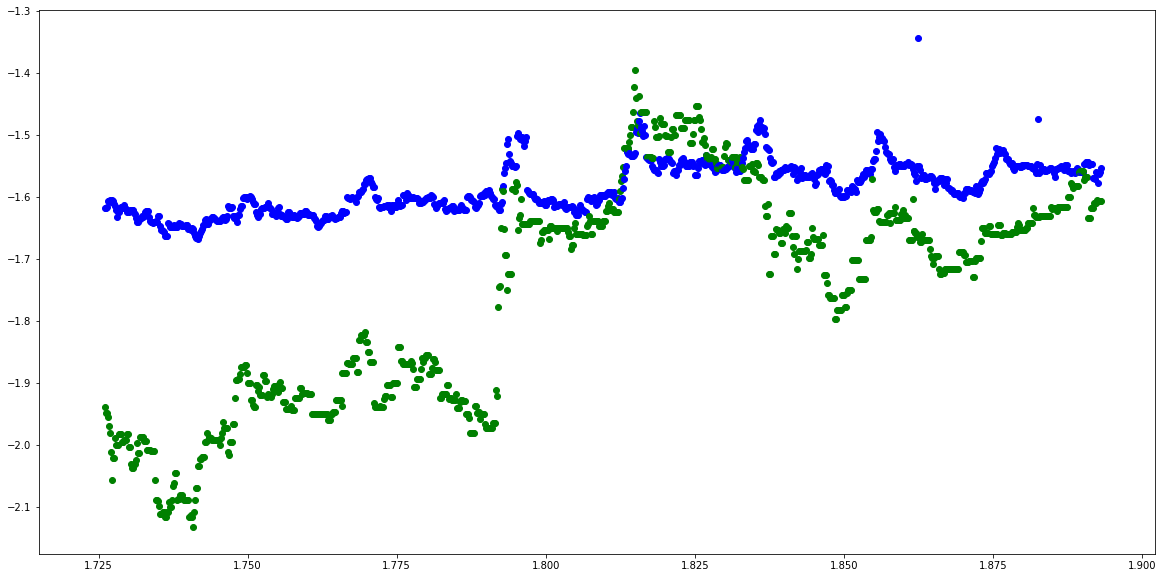

In [36]:
plt.figure(figsize=(20,10))
# visualizer.plot()
for color in ['blue']:
    for row in tqdm(visualizer2.date_pred_targ_dict.get(color, pd.DataFrame())[:1000].itertuples()):
        plt.scatter(row[1], row[-2], color=color)
        plt.scatter(row[1], row[-1], color='g')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
visualizer.plot()

4080it [00:53, 76.40it/s] 
6885it [04:24, 19.40it/s]

100it [00:00, 235.92it/s]


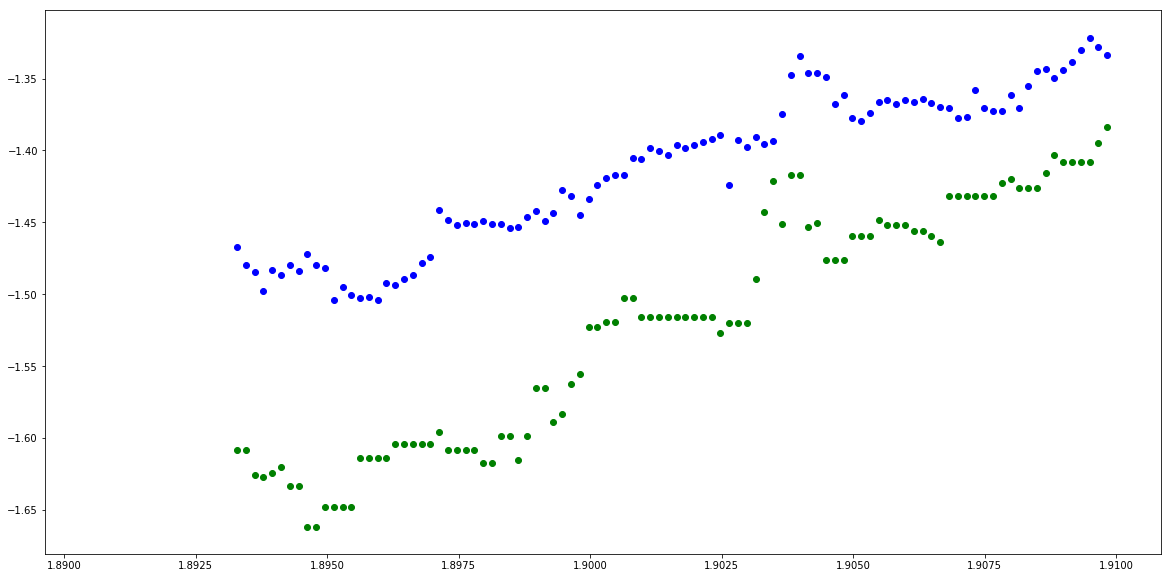

In [35]:
plt.figure(figsize=(20,10))
# visualizer.plot()
for color in ['blue']:
    for row in tqdm(visualizer.date_pred_targ_dict.get(color, pd.DataFrame())[1000:1100].itertuples()):
        plt.scatter(row[1], row[-2], color=color)
        plt.scatter(row[1], row[-1], color='g')
plt.show()

Hyperparameters:

- model:
    - embedding_dim=features*2  
    - hidden_dim=features*16  
- learning rate  
- batch size (window size?)
- DONE - DID IMPROVE criterion = nn.MSELoss()  
    - try a loss which scales through time.
- optimizer = torch.optim.Adam(model.parameters(), lr=lr)
- add polynomial features

no lr scheduler min val loss:  
`Epoch: 2/6... Step: 316... Loss: 0.292909... Val Loss: 0.068783
Validation loss decreased (0.072723 --> 0.068783).  Saving model ...`
MSE loss: 0.52932
MAE loss: 0.64894
KLDiv loss: 0.00000

with lr scheduler min val loss:  
`Epoch: 4/6... Step: 638... Loss: 0.052657... Val Loss: 0.052713
Validation loss decreased (0.052825 --> 0.052713).  Saving model ...`
MSE loss: 0.14511
MAE loss: 0.34314
KLDiv loss: 0.00000